<a href="https://colab.research.google.com/github/apthagowda97/computer_vision_poc/blob/master/classification/notebook/pytorch_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%%shell

wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
tar -xzf flower_photos.tgz

--2020-09-02 17:42:19--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M   168MB/s    in 1.3s    

2020-09-02 17:42:21 (168 MB/s) - ‘flower_photos.tgz.1’ saved [228813984/228813984]



In [15]:
import os
import cv2
import time
import copy
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from torchvision.transforms import *
from torchvision import transforms

In [42]:
np.random.seed(42);

In [43]:
image_name = [];flower_name = []
for dir_name in os.listdir('flower_photos'):
  if os.path.isdir(os.path.join('flower_photos',dir_name)):
    names = os.listdir(os.path.join('flower_photos',dir_name))
    image_name.extend(names);flower_name.extend([dir_name]*len(names))

In [44]:
le = LabelEncoder()
flower_df = pd.DataFrame(data={'flower_name':flower_name,'image_name':image_name})
flower_df['image_path'] = flower_df['flower_name']+'/'+flower_df['image_name']
flower_df['target'] = le.fit_transform(flower_df['flower_name'])
classes = le.classes_
print("Target : {}".format(classes))

Target : ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [45]:
flower_df = flower_df.sample(frac=1,random_state=42).reset_index(drop=True)
flower_df.head()

,flower_name,image_name,image_path,target
0,daisy,16819071290_471d99e166_m.jpg,daisy/16819071290_471d99e166_m.jpg,0
1,dandelion,468749497_951c571eff_n.jpg,dandelion/468749497_951c571eff_n.jpg,1
2,tulips,405035580_94b793e71d.jpg,tulips/405035580_94b793e71d.jpg,4
3,roses,6039330368_c30ed224c4_m.jpg,roses/6039330368_c30ed224c4_m.jpg,2
4,roses,5628552852_60bbe8d9b0_n.jpg,roses/5628552852_60bbe8d9b0_n.jpg,2


In [67]:
def plot_transform(index,transforms,repeat=1,size=(15,7)):
  
  plt.figure(figsize=size)
  num_images = repeat* len(transforms) + 1
  abs_image_path = os.path.join('flower_photos',flower_df['image_path'][index])
  plt.subplot(1,num_images,1);plt.axis('off')
  image = Image.open(abs_image_path)
  plt.imshow(image)
  plt.title("Original")
  image_index = 2
  for transform in transforms: 
    for i in range(repeat):
      plt.subplot(1,num_images,image_index)
      plt.axis('off')
      image = Image.open(abs_image_path)
      image = transform(image)
      plt.imshow(image)
      plt.title(str(transform).split('(')[0])
      image_index +=1

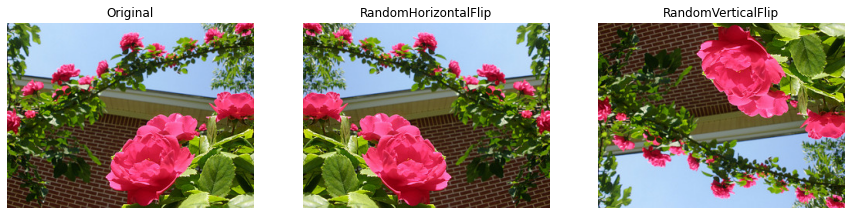

In [69]:
plot_transform(4, [RandomHorizontalFlip(p=1),RandomVerticalFlip(p=1)])

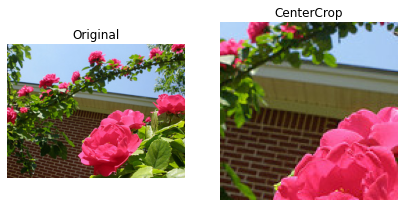

In [81]:
plot_transform(4, [CenterCrop(128)],repeat=1,size=(7,5))

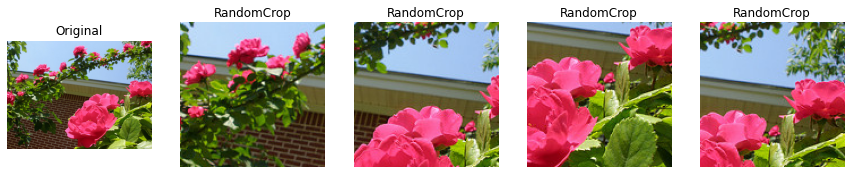

In [71]:
plot_transform(4, [RandomCrop(128)],repeat=4)

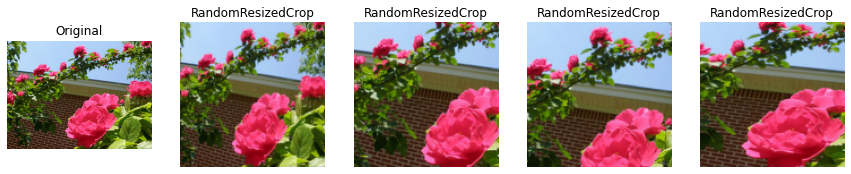

In [74]:
plot_transform(4, [RandomResizedCrop(128,scale=(0.4, 1.0))],repeat=4)

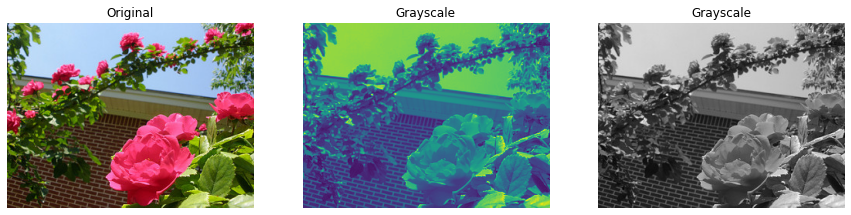

In [78]:
plot_transform(4, [Grayscale(num_output_channels=1),Grayscale(num_output_channels=3)],repeat=1)

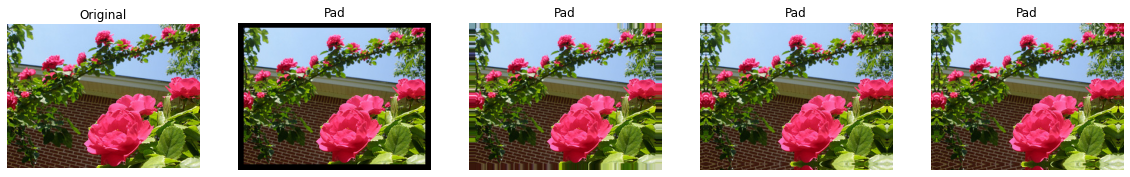

In [101]:
plot_transform(4, [Pad(10, fill=0, padding_mode='constant'),Pad(10,padding_mode='edge'),Pad(10,padding_mode='reflect'),Pad(10,padding_mode='symmetric')],size=(20,10))

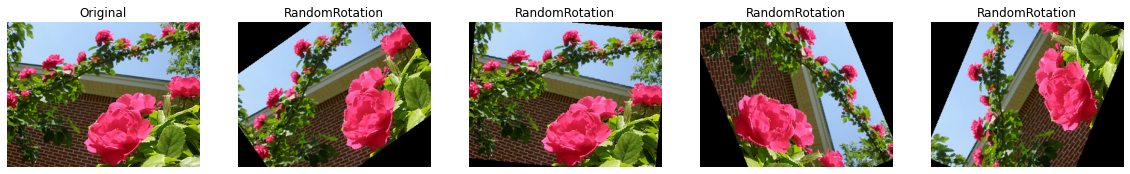

In [110]:
plot_transform(4, [RandomRotation(90)],repeat=4,size=(20,10))

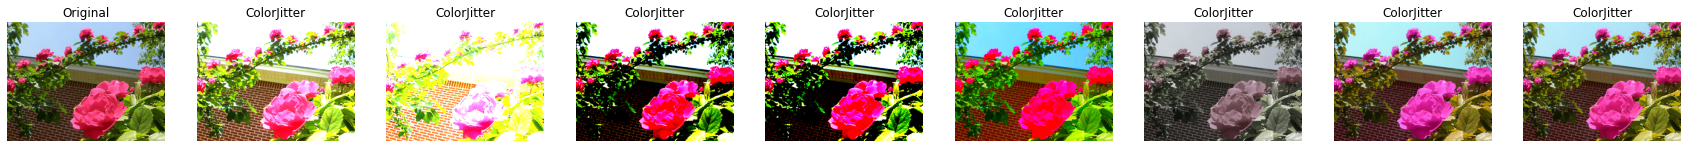

In [125]:
plot_transform(4, [ColorJitter(brightness=5), ColorJitter(contrast=5),ColorJitter( saturation=5),ColorJitter(hue=0.1)],repeat=2,size=(30,10))

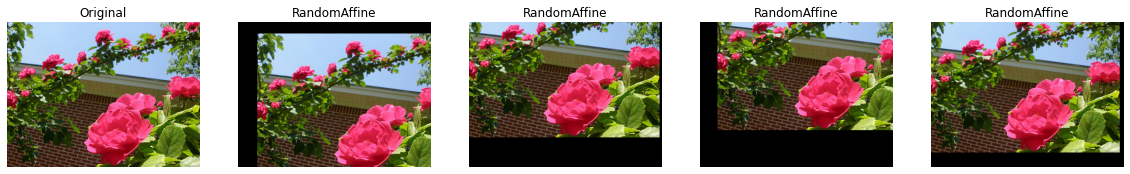

In [135]:
plot_transform(4,[RandomAffine(degrees=0,translate=(0.1,0.3))],repeat=4,size=(20,10))

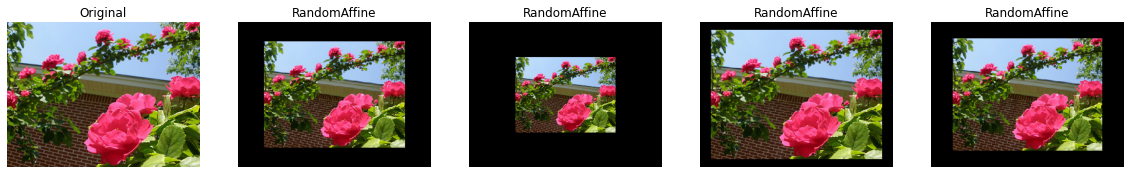

In [139]:
plot_transform(4,[RandomAffine(degrees=0,scale=(0.5,1))],repeat=4,size=(20,10))

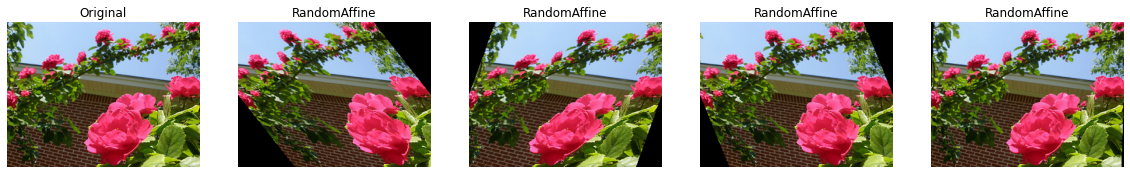

In [144]:
plot_transform(4,[RandomAffine(degrees=0,shear=(-45,45))],repeat=4,size=(20,10))